# Comparison of Distribution Privatizers

In [1]:
from pets_utilities import *
from plotting_utilities import *

from scipy.optimize import curve_fit

from seaborn import heatmap
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [2]:
def simulate_distribution_privatizer(emp_hist, dist_privatizer_epsilon, distance_measure):
    ### Generate private histograms
    laplace_priv_hist = laplace_mechanism(emp_hist, dist_privatizer_epsilon)
    cyclic_laplace_priv_hist = cyclic_laplace_mechanism(emp_hist, dist_privatizer_epsilon)
    privelet_priv_hist = privelet_haar_mechanism(emp_hist, dist_privatizer_epsilon)
    qyl_priv_hist = qyl_mechanism(emp_hist, dist_privatizer_epsilon, 16) ## 8-16 is recommeded by the authors
    
    ### Compute distance between private and original histogram
    laplace_dist = distance_measure(hist_to_dist(laplace_priv_hist), hist_to_dist(emp_hist))
    cyclic_laplace_dist = distance_measure(hist_to_dist(cyclic_laplace_priv_hist), hist_to_dist(emp_hist))
    privelet_dist = distance_measure(hist_to_dist(privelet_priv_hist), hist_to_dist(emp_hist))
    qyl_dist = distance_measure(hist_to_dist(qyl_priv_hist), hist_to_dist(emp_hist))
    return  {'laplace_dist': laplace_dist, 'cyclic_laplace_dist': cyclic_laplace_dist, 'privelet_dist': privelet_dist, 'qyl_dist': qyl_dist, 'n':len(emp_hist), 'dist_privatizer_epsilon':dist_privatizer_epsilon}

def measure_distribution_privatizer(emp_hist, dist_privatizer_epsilon, distance_measure = KS_distance, replications = 400):
    results = None
    for i in range(replications):
        if results is None:
            results = pd.DataFrame( simulate_distribution_privatizer(emp_hist, dist_privatizer_epsilon, distance_measure), index =[0])
        else:
            results.loc[len(results)] =  simulate_distribution_privatizer(emp_hist, dist_privatizer_epsilon, distance_measure) 

    summary = results.apply(np.mean, axis = 0)
    return summary

### Performance Plot (Wasserstein-1 Distance) -- Figure 3 in the Paper

In [3]:
np.random.seed(42)
laplace_epsilon = 1
dist_privatizer_res = None


for n in range(2, 102, 5):
    emp_hist = schools_hist(n)
    if dist_privatizer_res is None:
        dist_privatizer_res = pd.DataFrame(dict(measure_distribution_privatizer(emp_hist, laplace_epsilon, wasserstein_1_distance, replications = 4000)), index=[0])
    else:
        dist_privatizer_res.loc[len(dist_privatizer_res)] =  measure_distribution_privatizer(emp_hist, laplace_epsilon, wasserstein_1_distance, replications = 4000)


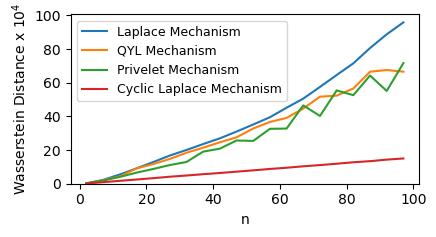

In [4]:
fig, ax = plt.subplots(1,1,figsize=(4.5, 2.2))


ax.plot(dist_privatizer_res['n'], dist_privatizer_res['laplace_dist']*10000, label = 'Laplace Mechanism', linestyle = '-')
ax.plot(dist_privatizer_res['n'], dist_privatizer_res['qyl_dist']*10000, label = 'QYL Mechanism', linestyle = '-')
ax.plot(dist_privatizer_res['n'], dist_privatizer_res['privelet_dist']*10000, label = 'Privelet Mechanism', linestyle = '-')
ax.plot(dist_privatizer_res['n'], dist_privatizer_res['cyclic_laplace_dist']*10000, label = 'Cyclic Laplace Mechanism', linestyle = '-')

plt.xlabel("n")
plt.ylim(ymin=0)

plt.ylabel("Wasserstein Distance x $10^4$")
plt.legend(loc='upper left', fontsize=9)
plt.show()

### Performance Plot (KS Distance)

In [10]:
np.random.seed(42)
laplace_epsilon = 1
dist_privatizer_res = None

for n in range(1, 100, 5):
    emp_hist = schools_hist(n)
    if dist_privatizer_res is None:
        dist_privatizer_res = pd.DataFrame(dict(measure_distribution_privatizer(emp_hist, laplace_epsilon, KS_distance, replications = 1000)), index=[0])
    else:
        dist_privatizer_res.loc[len(dist_privatizer_res)] =  measure_distribution_privatizer(emp_hist, laplace_epsilon, KS_distance, replications = 1000)


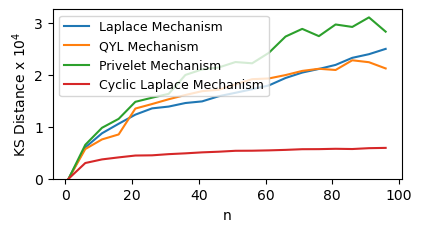

In [11]:
fig, ax = plt.subplots(1,1,figsize=(4.5, 2.2))

ax.plot(dist_privatizer_res['n'], dist_privatizer_res['laplace_dist']*10000, label = 'Laplace Mechanism', linestyle = '-')
ax.plot(dist_privatizer_res['n'], dist_privatizer_res['qyl_dist']*10000, label = 'QYL Mechanism', linestyle = '-')
ax.plot(dist_privatizer_res['n'], dist_privatizer_res['privelet_dist']*10000, label = 'Privelet Mechanism', linestyle = '-')
ax.plot(dist_privatizer_res['n'], dist_privatizer_res['cyclic_laplace_dist']*10000, label = 'Cyclic Laplace Mechanism', linestyle = '-')

plt.xlabel("n")
plt.ylim(ymin=0)

plt.ylabel("KS Distance x $10^4$")
plt.legend(loc='upper left', fontsize=9)
plt.show()

### Performance Plot (Total Deviation)

In [7]:
np.random.seed(42)
laplace_epsilon = 1
dist_privatizer_res = None


for n in range(1, 100, 5):
    emp_hist = schools_hist(n)
    if dist_privatizer_res is None:
        dist_privatizer_res = pd.DataFrame(dict(measure_distribution_privatizer(emp_hist, laplace_epsilon, total_deviation, replications = 1000)), index=[0])
    else:
        dist_privatizer_res.loc[len(dist_privatizer_res)] =  measure_distribution_privatizer(emp_hist, laplace_epsilon, total_deviation, replications = 1000)


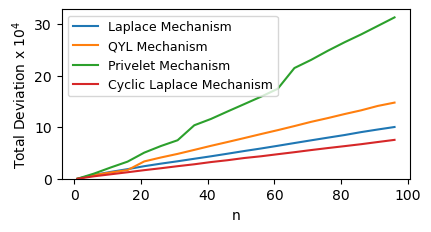

In [9]:
fig, ax = plt.subplots(1,1,figsize=(4.5, 2.2))

ax.plot(dist_privatizer_res['n'], dist_privatizer_res['laplace_dist']*10000, label = 'Laplace Mechanism', linestyle = '-')
ax.plot(dist_privatizer_res['n'], dist_privatizer_res['qyl_dist']*10000, label = 'QYL Mechanism', linestyle = '-')
ax.plot(dist_privatizer_res['n'], dist_privatizer_res['privelet_dist']*10000, label = 'Privelet Mechanism', linestyle = '-')
ax.plot(dist_privatizer_res['n'], dist_privatizer_res['cyclic_laplace_dist']*10000, label = 'Cyclic Laplace Mechanism', linestyle = '-')


plt.xlabel("n")
plt.ylim(ymin=0)

plt.ylabel("Total Deviation x $10^4$")
plt.legend(loc='upper left', fontsize=9)
plt.show()